In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import core
from kid_readout.measurement.io import nc

In [3]:
filename0 = '/data/detectors/2016-06-24_113807_sweep_stream_on_off.nc'
filename1 = '/data/detectors/2016-06-24_133009_sweep_stream_on_off.nc'
ncf0 = nc.NCFile(filename0)
ncf1 = nc.NCFile(filename1)

In [4]:
ss = ([ncf0.read(name) for name in ncf0.node_names() if name.startswith('SingleSweepStream')] + 
      [ncf1.read(name) for name in ncf1.node_names() if name.startswith('SingleSweepStream')])

In [8]:
# The script crashed while taking data for the third resonator.
ss0 = ss[0:6]
ss1 = ss[6:12]
ss2 = ss[12:17]
ss3 = ss[17:19]

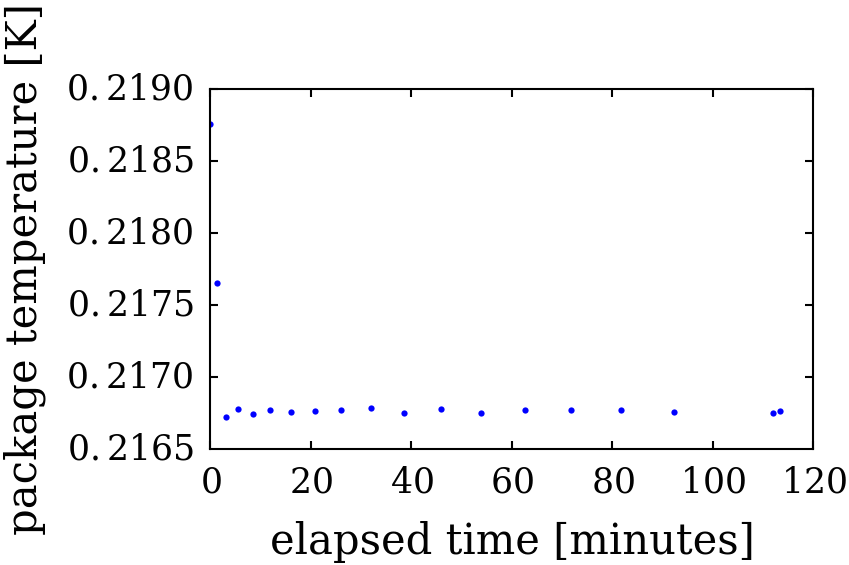

In [5]:
fig, ax = plt.subplots()
ax.plot([(s.stream.epoch - ss[0].stream.epoch) / 60 for s in ss],
        [s.state.temperature.package for s in ss],
        '.b')
ax.set_xlabel('elapsed time [minutes]')
ax.set_ylabel('package temperature [K]');

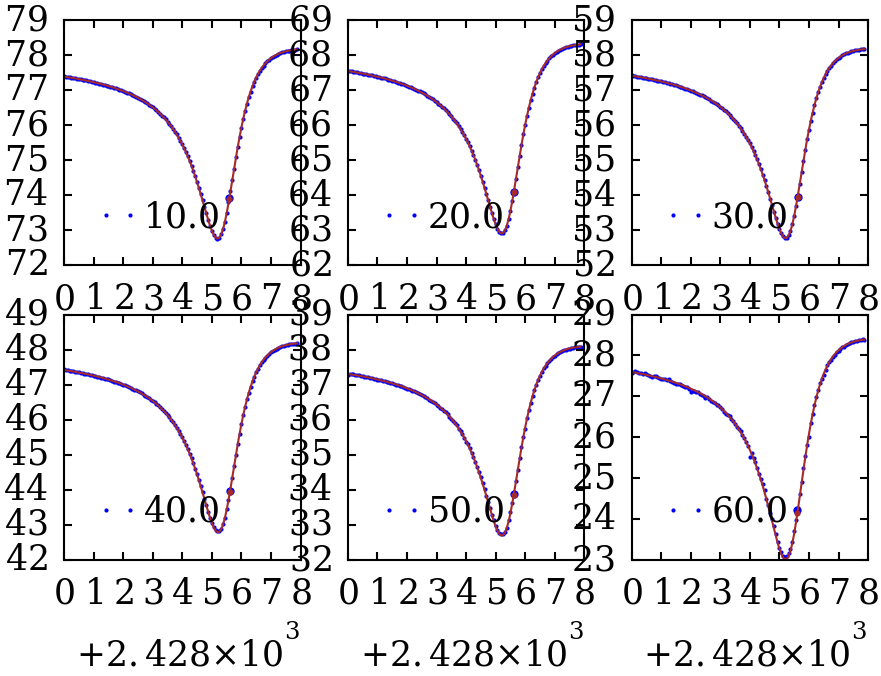

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss0, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

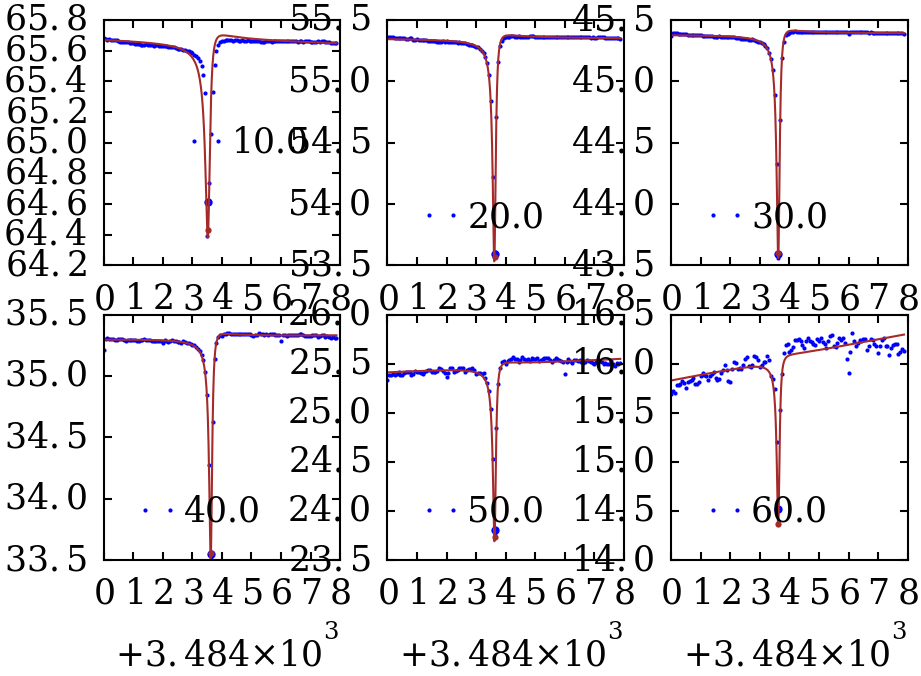

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss1, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

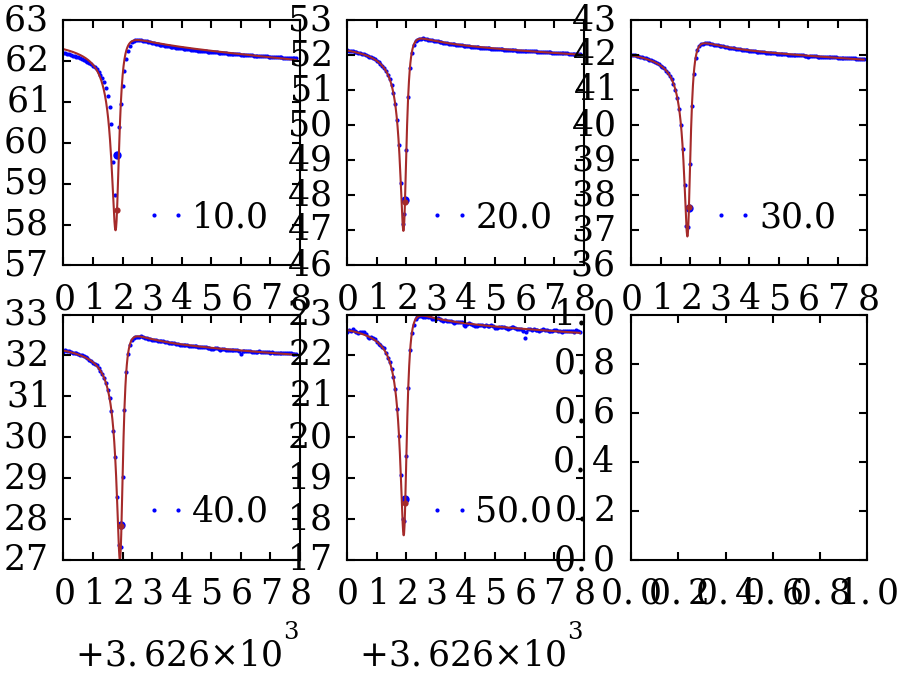

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss2, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

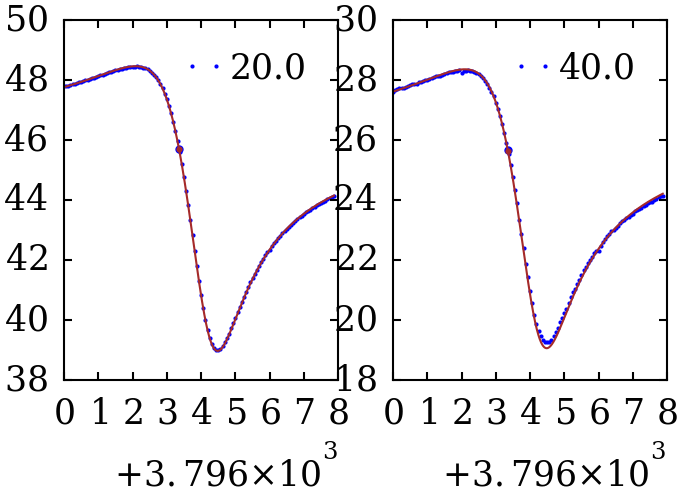

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(3, 2))

for s, ax in zip(ss3, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

In [13]:
df = pd.concat([s.to_dataframe() for s in ss])

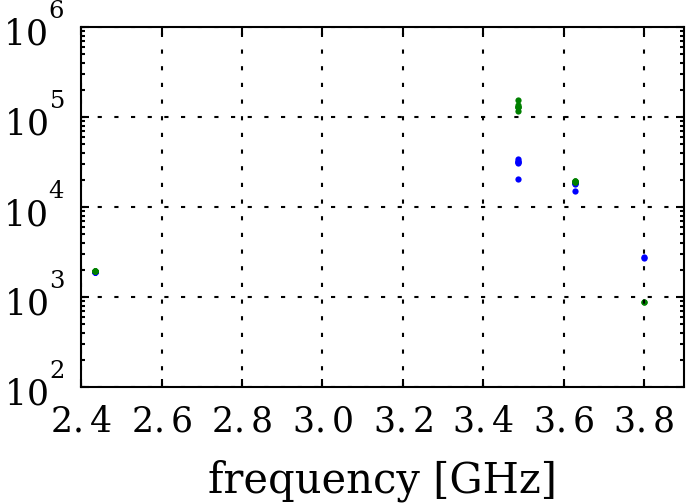

In [14]:
fig, ax = plt.subplots()

ax.plot(1e-9 * df.res_f_0, df.res_Q_i, '.')
ax.plot(1e-9 * df.res_f_0, df.res_Q_e_real, '.')

ax.set_xlim(2.4, 3.9)
ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
ax.grid(True);

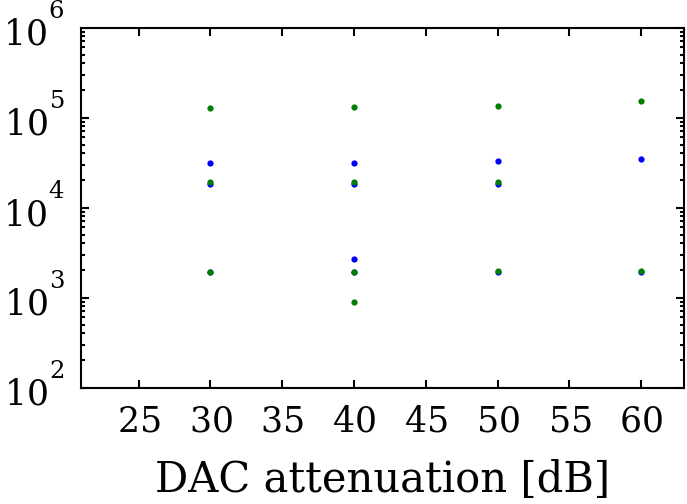

In [15]:
fig, ax = plt.subplots()

ax.plot(df.roach_dac_attenuation, df.res_Q_i, '.')
ax.plot(df.roach_dac_attenuation, df.res_Q_e_real, '.')

ax.set_xlim(21, 63)
ax.set_yscale('log')
ax.set_xlabel('DAC attenuation [dB]');

In [16]:
lo = np.unique(df.roach_lo_frequency)

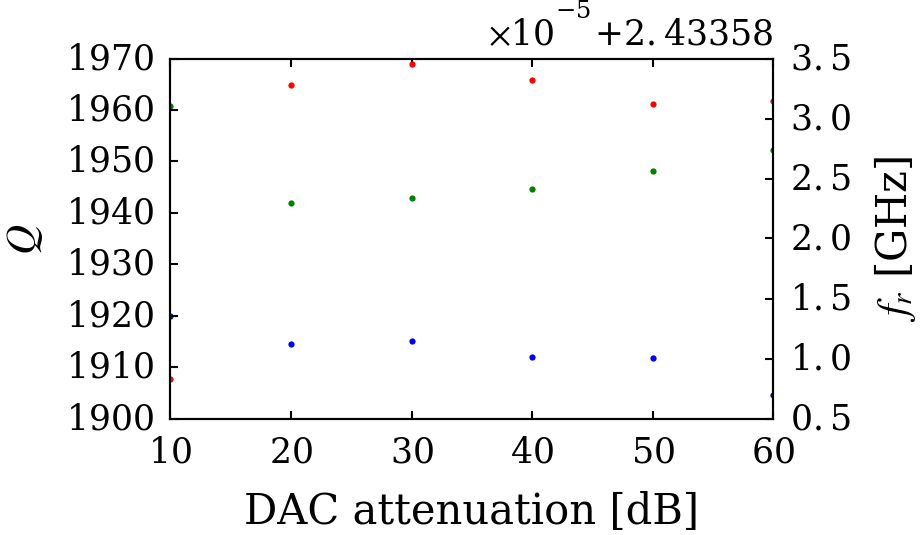

In [17]:
fig, q_ax = plt.subplots()
x_ax = q_ax.twinx()

for _, row in df[df.roach_lo_frequency==lo[0]].iterrows():
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_i, '.b')
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_e_real, '.g')
    x_ax.plot(row.roach_dac_attenuation, 1e-9 * row.res_f_0, '.r')

q_ax.set_xlabel('DAC attenuation [dB]')
q_ax.set_ylabel('$Q$')
x_ax.set_ylabel('$f_r$ [GHz]')

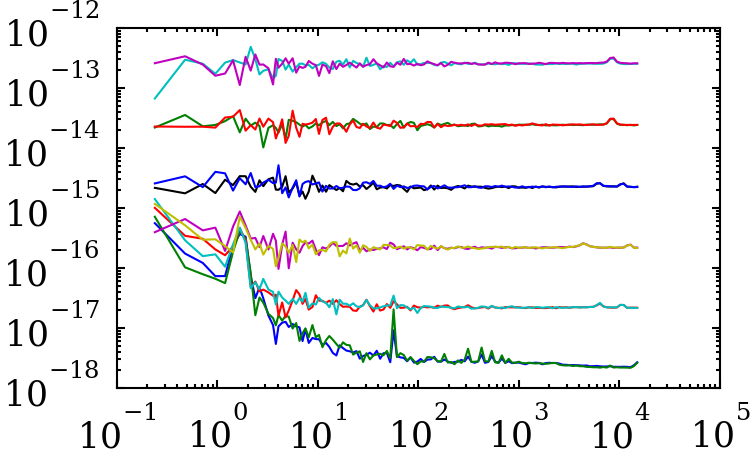

In [18]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[0]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)


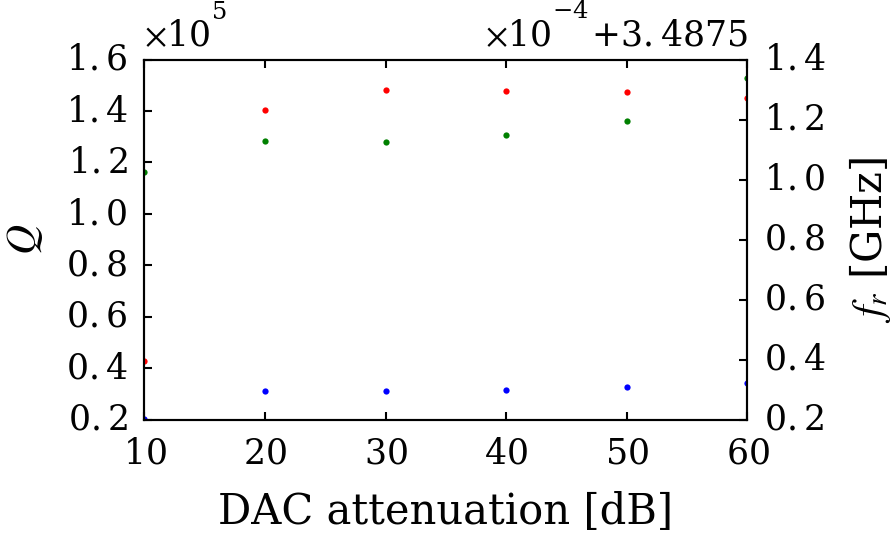

In [19]:
fig, q_ax = plt.subplots()
x_ax = q_ax.twinx()

for _, row in df[df.roach_lo_frequency==lo[1]].iterrows():
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_i, '.b')
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_e_real, '.g')
    x_ax.plot(row.roach_dac_attenuation, 1e-9 * row.res_f_0, '.r')

q_ax.set_xlabel('DAC attenuation [dB]')
q_ax.set_ylabel('$Q$')
x_ax.set_ylabel('$f_r$ [GHz]')

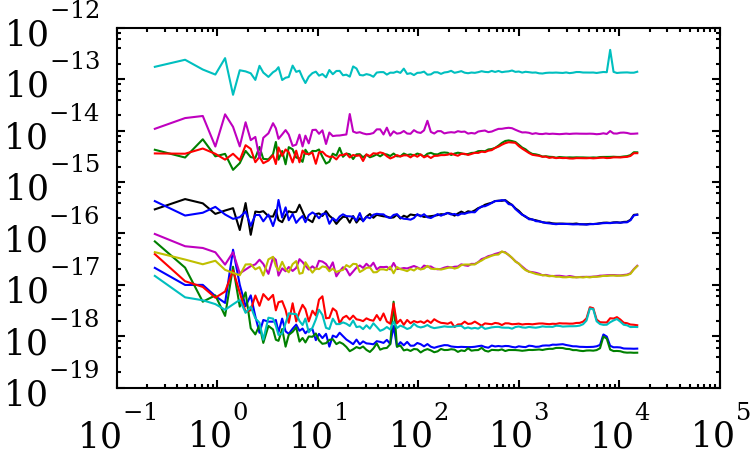

In [20]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[1]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

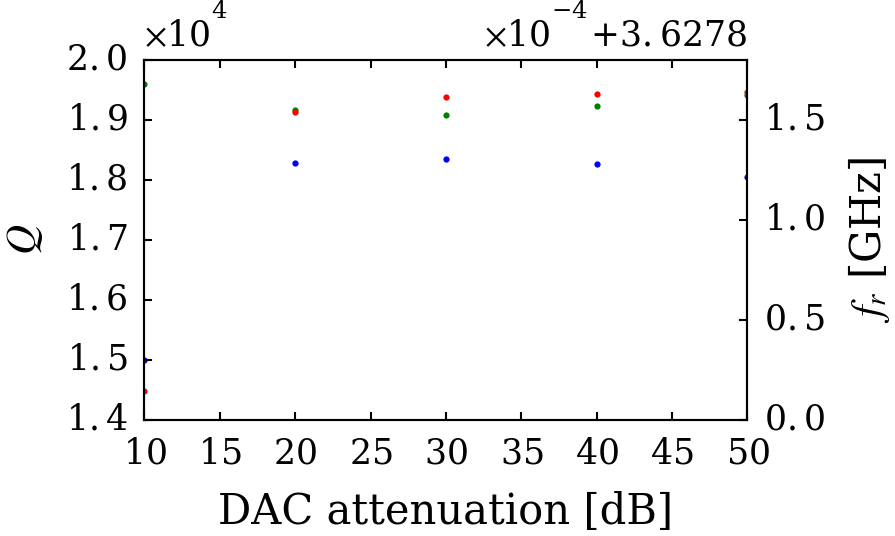

In [21]:
fig, q_ax = plt.subplots()
x_ax = q_ax.twinx()

for _, row in df[df.roach_lo_frequency==lo[2]].iterrows():
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_i, '.b')
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_e_real, '.g')
    x_ax.plot(row.roach_dac_attenuation, 1e-9 * row.res_f_0, '.r')

q_ax.set_xlabel('DAC attenuation [dB]')
q_ax.set_ylabel('$Q$')
x_ax.set_ylabel('$f_r$ [GHz]')

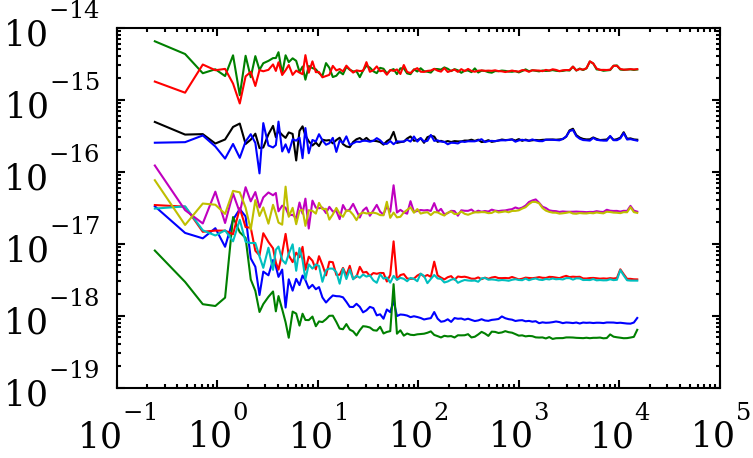

In [22]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[2]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

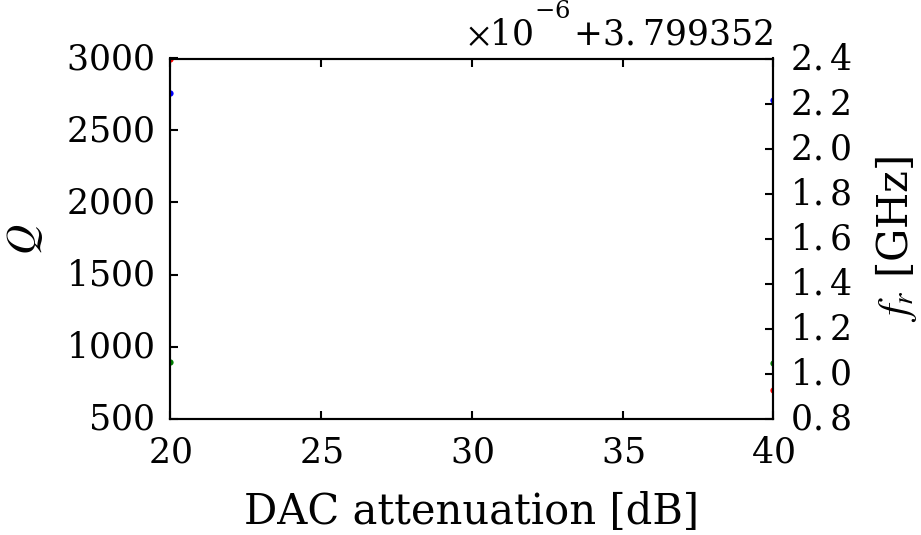

In [23]:
fig, q_ax = plt.subplots()
x_ax = q_ax.twinx()

for _, row in df[df.roach_lo_frequency==lo[3]].iterrows():
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_i, '.b')
    q_ax.plot(row.roach_dac_attenuation, row.res_Q_e_real, '.g')
    x_ax.plot(row.roach_dac_attenuation, 1e-9 * row.res_f_0, '.r')

q_ax.set_xlabel('DAC attenuation [dB]')
q_ax.set_ylabel('$Q$')
x_ax.set_ylabel('$f_r$ [GHz]')

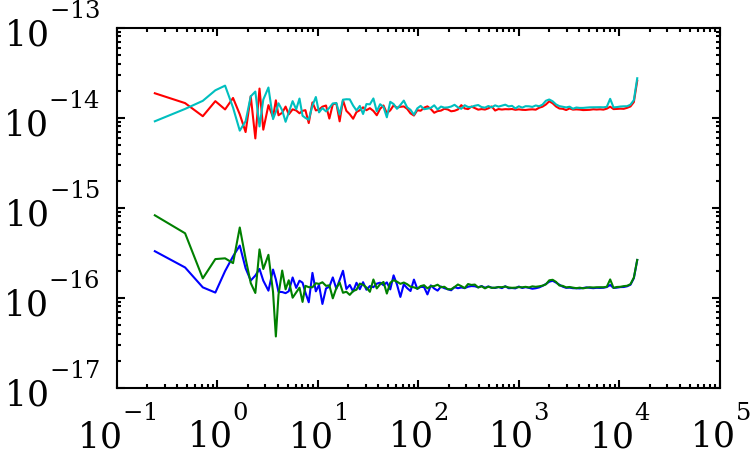

In [24]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[3]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

In [25]:
df.iloc[6:12].res_Q_i

0    20232.020794
0    31202.439515
0    31275.964737
0    31496.619788
0    32449.105415
0    34182.116363
Name: res_Q_i, dtype: float64